In [50]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests 

In [51]:
# Creating Directories for both fake and real Image
!mkdir fault_card_folder
!mkdir fault_card_folder/images 

mkdir: cannot create directory ‘fault_card_folder’: File exists
mkdir: cannot create directory ‘fault_card_folder/images’: File exists


In [52]:
# Lets import the images (Real and Fake)
real_image = Image.open(requests.get("https://media.fuzia.com/assets/uploads/images/co_brand_1/article/2020/1595588775100-buy-fake-id-card-online.jpeg", stream =True).raw) 
fake_image = Image.open(requests.get("https://driverlicensefake.com/wp-content/uploads/2022/03/UK-id-card-generator-template-1.jpg",stream =True).raw)

In [53]:
# The file format of the source file.
print("Original image format : ",real_image.format) 
print("Tampered image format : ",fake_image.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",real_image.size) 
print("Tampered image size : ",fake_image.size)  

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (940, 673)
Tampered image size :  (600, 600)


In [54]:
# Resize Image
real_image = real_image.resize((260, 260)) 
print(real_image.size)
real_image.save('fault_card_folder/images/real_image.jpeg')#Save image
fake_image = fake_image.resize((260,260))
print(fake_image.size)  
fake_image.save('fault_card_folder/images/fake_image.jpeg')#Saves image  

(260, 260)
(260, 260)


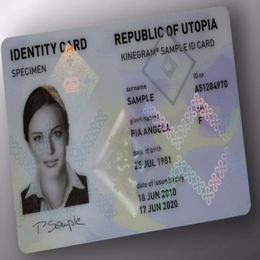

In [55]:
# Visualize the real and fake image
(real_image)

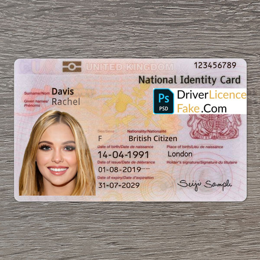

In [56]:
# Visualize Fake Image
fake_image

In [57]:
# Lets load the real and fake image in cv2 format sp we can apply cv2 application on them

real_image = cv2.imread("fault_card_folder/images/real_image.jpeg")
fake_image = cv2.imread("fault_card_folder/images/fake_image.jpeg")

In [58]:
# Next is to convert both images into grayscale, why? the import images were colored and so complex because they had 3 channels which are RGB,
# But Grayscale convert the images into 1 channel which make it more readable 

real_image_gray = cv2.cvtColor(real_image, cv2.COLOR_BGR2GRAY)
fake_image_gray = cv2.cvtColor(fake_image, cv2.COLOR_BGR2GRAY) 

In [59]:
# Lets Visiaulize 
real_image_gray

array([[233, 233, 233, ..., 143, 143, 143],
       [233, 233, 233, ..., 143, 143, 143],
       [233, 233, 233, ..., 143, 143, 143],
       ...,
       [132, 132, 131, ...,  67,  67,  67],
       [132, 132, 131, ...,  67,  67,  67],
       [132, 132, 131, ...,  67,  67,  67]], dtype=uint8)

In [60]:
# Lets Visiaulize 
fake_image_gray

array([[137, 135, 129, ..., 108, 116, 120],
       [124, 120, 115, ..., 105, 105, 101],
       [123, 130, 132, ..., 106, 110, 115],
       ...,
       [149, 145, 140, ..., 138, 140, 141],
       [154, 152, 147, ..., 117, 116, 116],
       [138, 140, 139, ..., 147, 143, 142]], dtype=uint8)

In [61]:
# Grayscale_Diff 
gray_scale_diff = real_image_gray - fake_image_gray
print(gray_scale_diff)

# Graycale Shape 
print(gray_scale_diff.shape)

# Graycale Size
print(gray_scale_diff.size)

[[ 96  98 104 ...  35  27  23]
 [109 113 118 ...  38  38  42]
 [110 103 101 ...  37  33  28]
 ...
 [239 243 247 ... 185 183 182]
 [234 236 240 ... 206 207 207]
 [250 248 248 ... 176 180 181]]
(260, 260)
67600


In [62]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(real_image_gray, fake_image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score)) 

SSIM: 0.17306968310051085


**From above we can pass a threshold for any supplied images to either accept/reject any images presented due to threshold level being pass/fail**

SSIM for the result is 17% which is low and this cant be passed or accepted

In [63]:
# Calculating threshold 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Calculating contours
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)   

In [64]:
# loop over the contours
for c in contours:
    # applying contours on image
    # Please note the
    # X : length Y: Breathe , W : Weight, H : Height of the contour rectangle 
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(real_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(fake_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


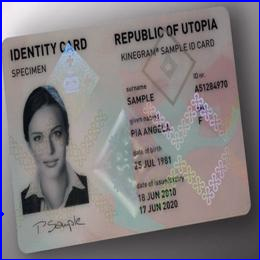

In [65]:
# Visualize Real Image 
print('Original Format Image')
Image.fromarray(real_image)

Original Format Image


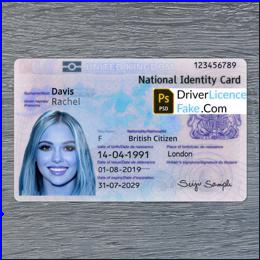

In [66]:
# Visualize Fake Image 
print('Original Format Image')
Image.fromarray(fake_image)

Different Image


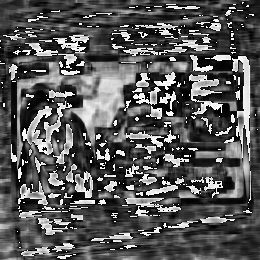

In [67]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff) 

**Black or dark sport on diff represent the spot of dis-similarity in both images**

Threshold Image


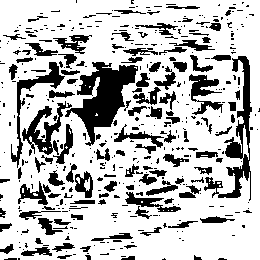

In [68]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

**White spot on the threshold are the allignment or similarity between the two images**

**We can use result from the SSIM number and the diff and threshold to concluded that the provided Card is Fake**

**Project Summary**
Findingout structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
As, our SSIM is ~17.3 % we can say that the image user provided is fake or tampered.
Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.


**Scope**

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.